In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_csv("cleaned_data.csv")

In [12]:
# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [13]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 1. Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# Prediction & Evaluation
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

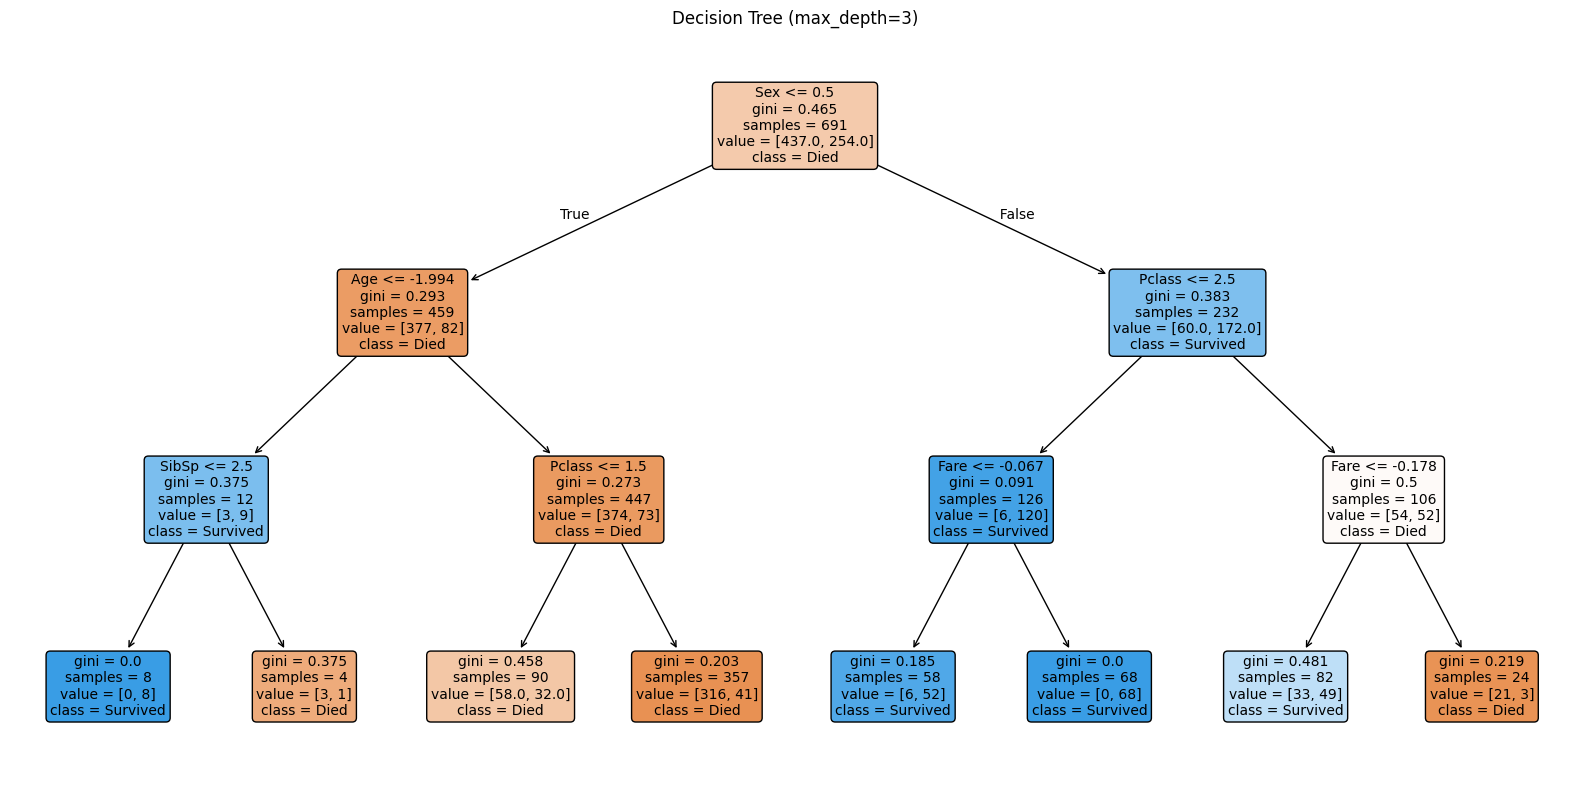

In [23]:
plt.figure(figsize=(16, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Died', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=3)")
plt.tight_layout()
plt.savefig("decision_tree_plot_fixed.png")  # Save image in your folder
plt.show()  # Show the graph in notebook

In [17]:
# 3. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# Prediction & Evaluation
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

In [19]:
# 4. Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [27]:
# 5. Cross-validation score
rf_cv_score = cross_val_score(rf_model, X, y, cv=5).mean()
{
    "Decision Tree Accuracy": dt_accuracy,
    "Random Forest Accuracy": rf_accuracy,
    "Random Forest CV Score": rf_cv_score,
    "Top 5 Important Features": feature_importances.head()
}

{'Decision Tree Accuracy': 0.7803468208092486,
 'Random Forest Accuracy': 0.791907514450867,
 'Random Forest CV Score': np.float64(0.8113590536362414),
 'Top 5 Important Features': Sex       0.273562
 Fare      0.259692
 Age       0.249466
 Pclass    0.087109
 SibSp     0.055240
 dtype: float64}